In [1]:
%load_ext autoreload
%autoreload 2
# Import necessary modules and extensions
import numpy as np
import matplotlib.pyplot as plt
import copy
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.BH_Classes import BH
import modules.Utility as util
from timeit import default_timer as timer
from scipy.optimize import curve_fit

# Set test range paremeters
ps = ([0] + list(range(1,34,3))) #finish at 34
thetas = [10,2,1.5,1.25,1,0.9,0.7,0.5,0.3]
ns = [2**n for n in range(2,14)] #finish at 14
box_size = 1000
max_property = 1

# Generate particles to be simulated throughout using a beta distribution
initial_2D_particle_collections = []
initial_3D_particle_collections = []
for n in ns:
    print("n:", n)
    initial_2D_particles = []
    initial_3D_particles = []
    initial_2D_positions = np.random.beta(2,2,(n,2)) * box_size 
    initial_3D_positions = np.random.beta(2,2,(n,3)) * box_size
    for i, initial_2D_position in enumerate(initial_2D_positions):
        # Particles have either positive or negative property
        initial_2D_particles.append(Particle(initial_2D_position, np.random.uniform(-max_property,max_property)))
        initial_3D_particles.append(Particle(initial_3D_positions[i], np.random.uniform(-max_property,max_property)))
    initial_2D_particle_collections.append(initial_2D_particles)
    initial_3D_particle_collections.append(initial_3D_particles)



n: 4
n: 8
n: 16
n: 32
n: 64
n: 128
n: 256
n: 512
n: 1024
n: 2048
n: 4096
n: 8192


In [2]:
# Perform direct simulations in 2D and 3D and save results
direct_2D_particles_collection = [copy.deepcopy(initial_2D_particle_collection) for initial_2D_particle_collection in initial_2D_particle_collections]
direct_2D_results = []
direct_3D_particles_collection = [copy.deepcopy(initial_3D_particle_collection) for initial_3D_particle_collection in initial_3D_particle_collections]
direct_3D_results = []

for i, direct_2D_particles in enumerate(direct_2D_particles_collection):
    print("i:", i)
    direct_2D_simulation = Direct(box_size, direct_2D_particles)
    direct_3D_simulation = Direct(box_size, direct_3D_particles_collection[i])
    timer_2D = timer()
    direct_2D_result = direct_2D_simulation.run_potential()
    direct_2D_result.sim_time = timer() - timer_2D
    timer_3D = timer()
    direct_3D_result = direct_3D_simulation.run_forces()
    direct_3D_result.sim_time = timer() - timer_3D
    direct_2D_results.append(direct_2D_result)
    direct_3D_results.append(direct_3D_result)

i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
Progress: particle number 1000
1000
i: 9
Progress: particle number 1000
Progress: particle number 2000
1000
2000
i: 10
Progress: particle number 1000
Progress: particle number 2000
Progress: particle number 3000
Progress: particle number 4000
1000
2000
3000
4000
i: 11
Progress: particle number 1000
Progress: particle number 2000
Progress: particle number 3000
Progress: particle number 4000
Progress: particle number 5000
Progress: particle number 6000
Progress: particle number 7000
Progress: particle number 8000
1000
2000
3000
4000
5000
6000
7000
8000


In [3]:
# Perform fmm simulations and save results
fmm_results = [[None for _ in range(len(ps))] for _ in range(len(ns))]
fmm_direct_diff_results = [[None for _ in range(len(ps))] for _ in range(len(ns))]
log_fmm_direct_diff_results = [[None for _ in range(len(ps))] for _ in range(len(ns))]

for i, n in enumerate(ns):
    for j, p in enumerate(ps):
        print(f"n: {n}, p: {p}")
        fmm_particles = copy.deepcopy(initial_2D_particle_collections[i])
        fmm_simulation = FMM(box_size, fmm_particles, p=p)
        fmm_timer = timer()
        fmm_result = fmm_simulation.run(False)
        sim_time = timer() - fmm_timer
        fmm_result.sim_time = sim_time

        # Find differences between this fmm simulation and the direct simulation
        fmm_direct_diff_result = util.calc_difference_results(fmm_particles, 
                                                              direct_2D_particles_collection[i], plotting=False)
        fmm_direct_diff_result.sim_time = sim_time
        log_fmm_direct_diff_result = util.calc_log_relative_error_results(fmm_particles, 
                                                                          direct_2D_particles_collection[i], plotting=False)
        log_fmm_direct_diff_result.sim_time = sim_time

        # Save results
        fmm_results[i][j] = fmm_result
        fmm_direct_diff_results[i][j] = fmm_direct_diff_result
        log_fmm_direct_diff_results[i][j] = log_fmm_direct_diff_result



n: 4, p: 0
n: 4, p: 1
n: 4, p: 4
n: 4, p: 7
n: 4, p: 10
n: 4, p: 13
n: 4, p: 16
n: 4, p: 19
n: 4, p: 22
n: 4, p: 25
n: 4, p: 28
n: 4, p: 31
n: 8, p: 0
n: 8, p: 1
n: 8, p: 4
n: 8, p: 7
n: 8, p: 10
n: 8, p: 13
n: 8, p: 16
n: 8, p: 19


/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Utility.py:51: RuntimeWarning: divide by zero encountered in log10
  log_rel_errors = np.log10(np.abs(np.array(potential_differences) / np.array(reference_potentials)))


n: 8, p: 22
n: 8, p: 25
n: 8, p: 28
n: 8, p: 31
n: 16, p: 0
n: 16, p: 1
n: 16, p: 4
n: 16, p: 7
n: 16, p: 10
n: 16, p: 13
n: 16, p: 16
n: 16, p: 19
n: 16, p: 22
n: 16, p: 25
n: 16, p: 28
n: 16, p: 31
n: 32, p: 0
n: 32, p: 1
n: 32, p: 4
n: 32, p: 7
n: 32, p: 10
n: 32, p: 13
n: 32, p: 16
n: 32, p: 19
n: 32, p: 22
n: 32, p: 25
n: 32, p: 28
n: 32, p: 31
n: 64, p: 0
n: 64, p: 1
n: 64, p: 4
n: 64, p: 7
n: 64, p: 10
n: 64, p: 13
n: 64, p: 16
n: 64, p: 19
n: 64, p: 22
n: 64, p: 25
n: 64, p: 28
n: 64, p: 31
n: 128, p: 0
n: 128, p: 1
n: 128, p: 4
n: 128, p: 7
n: 128, p: 10
n: 128, p: 13
n: 128, p: 16
n: 128, p: 19
n: 128, p: 22
n: 128, p: 25
n: 128, p: 28
n: 128, p: 31
n: 256, p: 0
n: 256, p: 1
n: 256, p: 4
n: 256, p: 7
n: 256, p: 10
n: 256, p: 13
n: 256, p: 16
n: 256, p: 19
n: 256, p: 22
n: 256, p: 25
n: 256, p: 28
n: 256, p: 31
n: 512, p: 0
n: 512, p: 1
n: 512, p: 4
n: 512, p: 7
n: 512, p: 10
n: 512, p: 13
n: 512, p: 16
n: 512, p: 19
n: 512, p: 22
n: 512, p: 25
n: 512, p: 28
n: 512, p: 31
n: 1

In [4]:
# Perform bh simulations and save results
thetas = [10,2,1.5,1.25,1,0.9,0.7,0.5,0.3]
bh_results = [[None for _ in range(len(thetas))] for _ in range(len(ns))]
bh_direct_diff_results = [[None for _ in range(len(thetas))] for _ in range(len(ns))]
log_bh_direct_diff_results = [[None for _ in range(len(thetas))] for _ in range(len(ns))]
centre_position = np.ones(3) * box_size/2

for i, n in enumerate(ns):
    for j, theta in enumerate(thetas):
        print(f"n: {n}, theta: {theta}")
        bh_particles = copy.deepcopy(initial_3D_particle_collections[i])
        bh_simulation = BH(box_size, bh_particles, theta=theta)
        bh_timer = timer()
        bh_result = bh_simulation.run(centre_position, False)
        sim_time = timer() - bh_timer
        bh_result.sim_time = sim_time

        # Find differences between this bh simulation and the direct simulation
        bh_direct_diff_result = util.calc_3D_difference_results(bh_particles, direct_3D_particles_collection[i], 
                                                                centre_position, plotting=False)
        bh_direct_diff_result.sim_time = sim_time
        log_bh_direct_diff_result = util.calc_3D_relative_error_results(bh_particles, direct_3D_particles_collection[i], 
                                                                        centre_position, plotting=False)
        log_bh_direct_diff_result.sim_time = sim_time

        # Save results
        bh_results[i][j] = bh_result
        bh_direct_diff_results[i][j] = bh_direct_diff_result
        log_bh_direct_diff_results[i][j] = log_bh_direct_diff_result

n: 4, theta: 10
n: 4, theta: 2
n: 4, theta: 1.5
n: 4, theta: 1.25
n: 4, theta: 1
n: 4, theta: 0.9
n: 4, theta: 0.7
n: 4, theta: 0.5
n: 4, theta: 0.3
n: 8, theta: 10
n: 8, theta: 2
n: 8, theta: 1.5
n: 8, theta: 1.25
n: 8, theta: 1
n: 8, theta: 0.9
n: 8, theta: 0.7
n: 8, theta: 0.5
n: 8, theta: 0.3
n: 16, theta: 10
n: 16, theta: 2
n: 16, theta: 1.5
n: 16, theta: 1.25
n: 16, theta: 1
n: 16, theta: 0.9
n: 16, theta: 0.7
n: 16, theta: 0.5
n: 16, theta: 0.3
n: 32, theta: 10
n: 32, theta: 2
n: 32, theta: 1.5
n: 32, theta: 1.25
n: 32, theta: 1
n: 32, theta: 0.9


/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Utility.py:85: RuntimeWarning: divide by zero encountered in log10
  log_rel_errors = np.log10(np.abs(np.array(delta_accelerations) / np.array(reference_accelerations)))
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


n: 32, theta: 0.7
n: 32, theta: 0.5
n: 32, theta: 0.3
n: 64, theta: 10
n: 64, theta: 2
n: 64, theta: 1.5
n: 64, theta: 1.25
n: 64, theta: 1
n: 64, theta: 0.9
n: 64, theta: 0.7
n: 64, theta: 0.5
n: 64, theta: 0.3
n: 128, theta: 10
n: 128, theta: 2
n: 128, theta: 1.5
n: 128, theta: 1.25
n: 128, theta: 1
n: 128, theta: 0.9
n: 128, theta: 0.7
n: 128, theta: 0.5
n: 128, theta: 0.3
n: 256, theta: 10
n: 256, theta: 2
n: 256, theta: 1.5
n: 256, theta: 1.25
n: 256, theta: 1
n: 256, theta: 0.9
n: 256, theta: 0.7
n: 256, theta: 0.5
n: 256, theta: 0.3
n: 512, theta: 10
n: 512, theta: 2
n: 512, theta: 1.5
n: 512, theta: 1.25
n: 512, theta: 1
n: 512, theta: 0.9
n: 512, theta: 0.7
n: 512, theta: 0.5
n: 512, theta: 0.3
n: 1024, theta: 10
n: 1024, theta: 2
n: 1024, theta: 1.5
n: 1024, theta: 1.25
n: 1024, theta: 1
n: 1024, theta: 0.9
n: 1024, theta: 0.7
n: 1024, theta: 0.5
n: 1024, theta: 0.3
n: 2048, theta: 10
n: 2048, theta: 2
n: 2048, theta: 1.5
n: 2048, theta: 1.25
n: 2048, theta: 1
n: 2048, theta:

FMM Fit a=1.5e-04, b=2.2e-06, c=8.4e-05, d=-3.0e-02
BH Fit a=-1.8e-06, b=1.6e-03, c=-2.1e-01


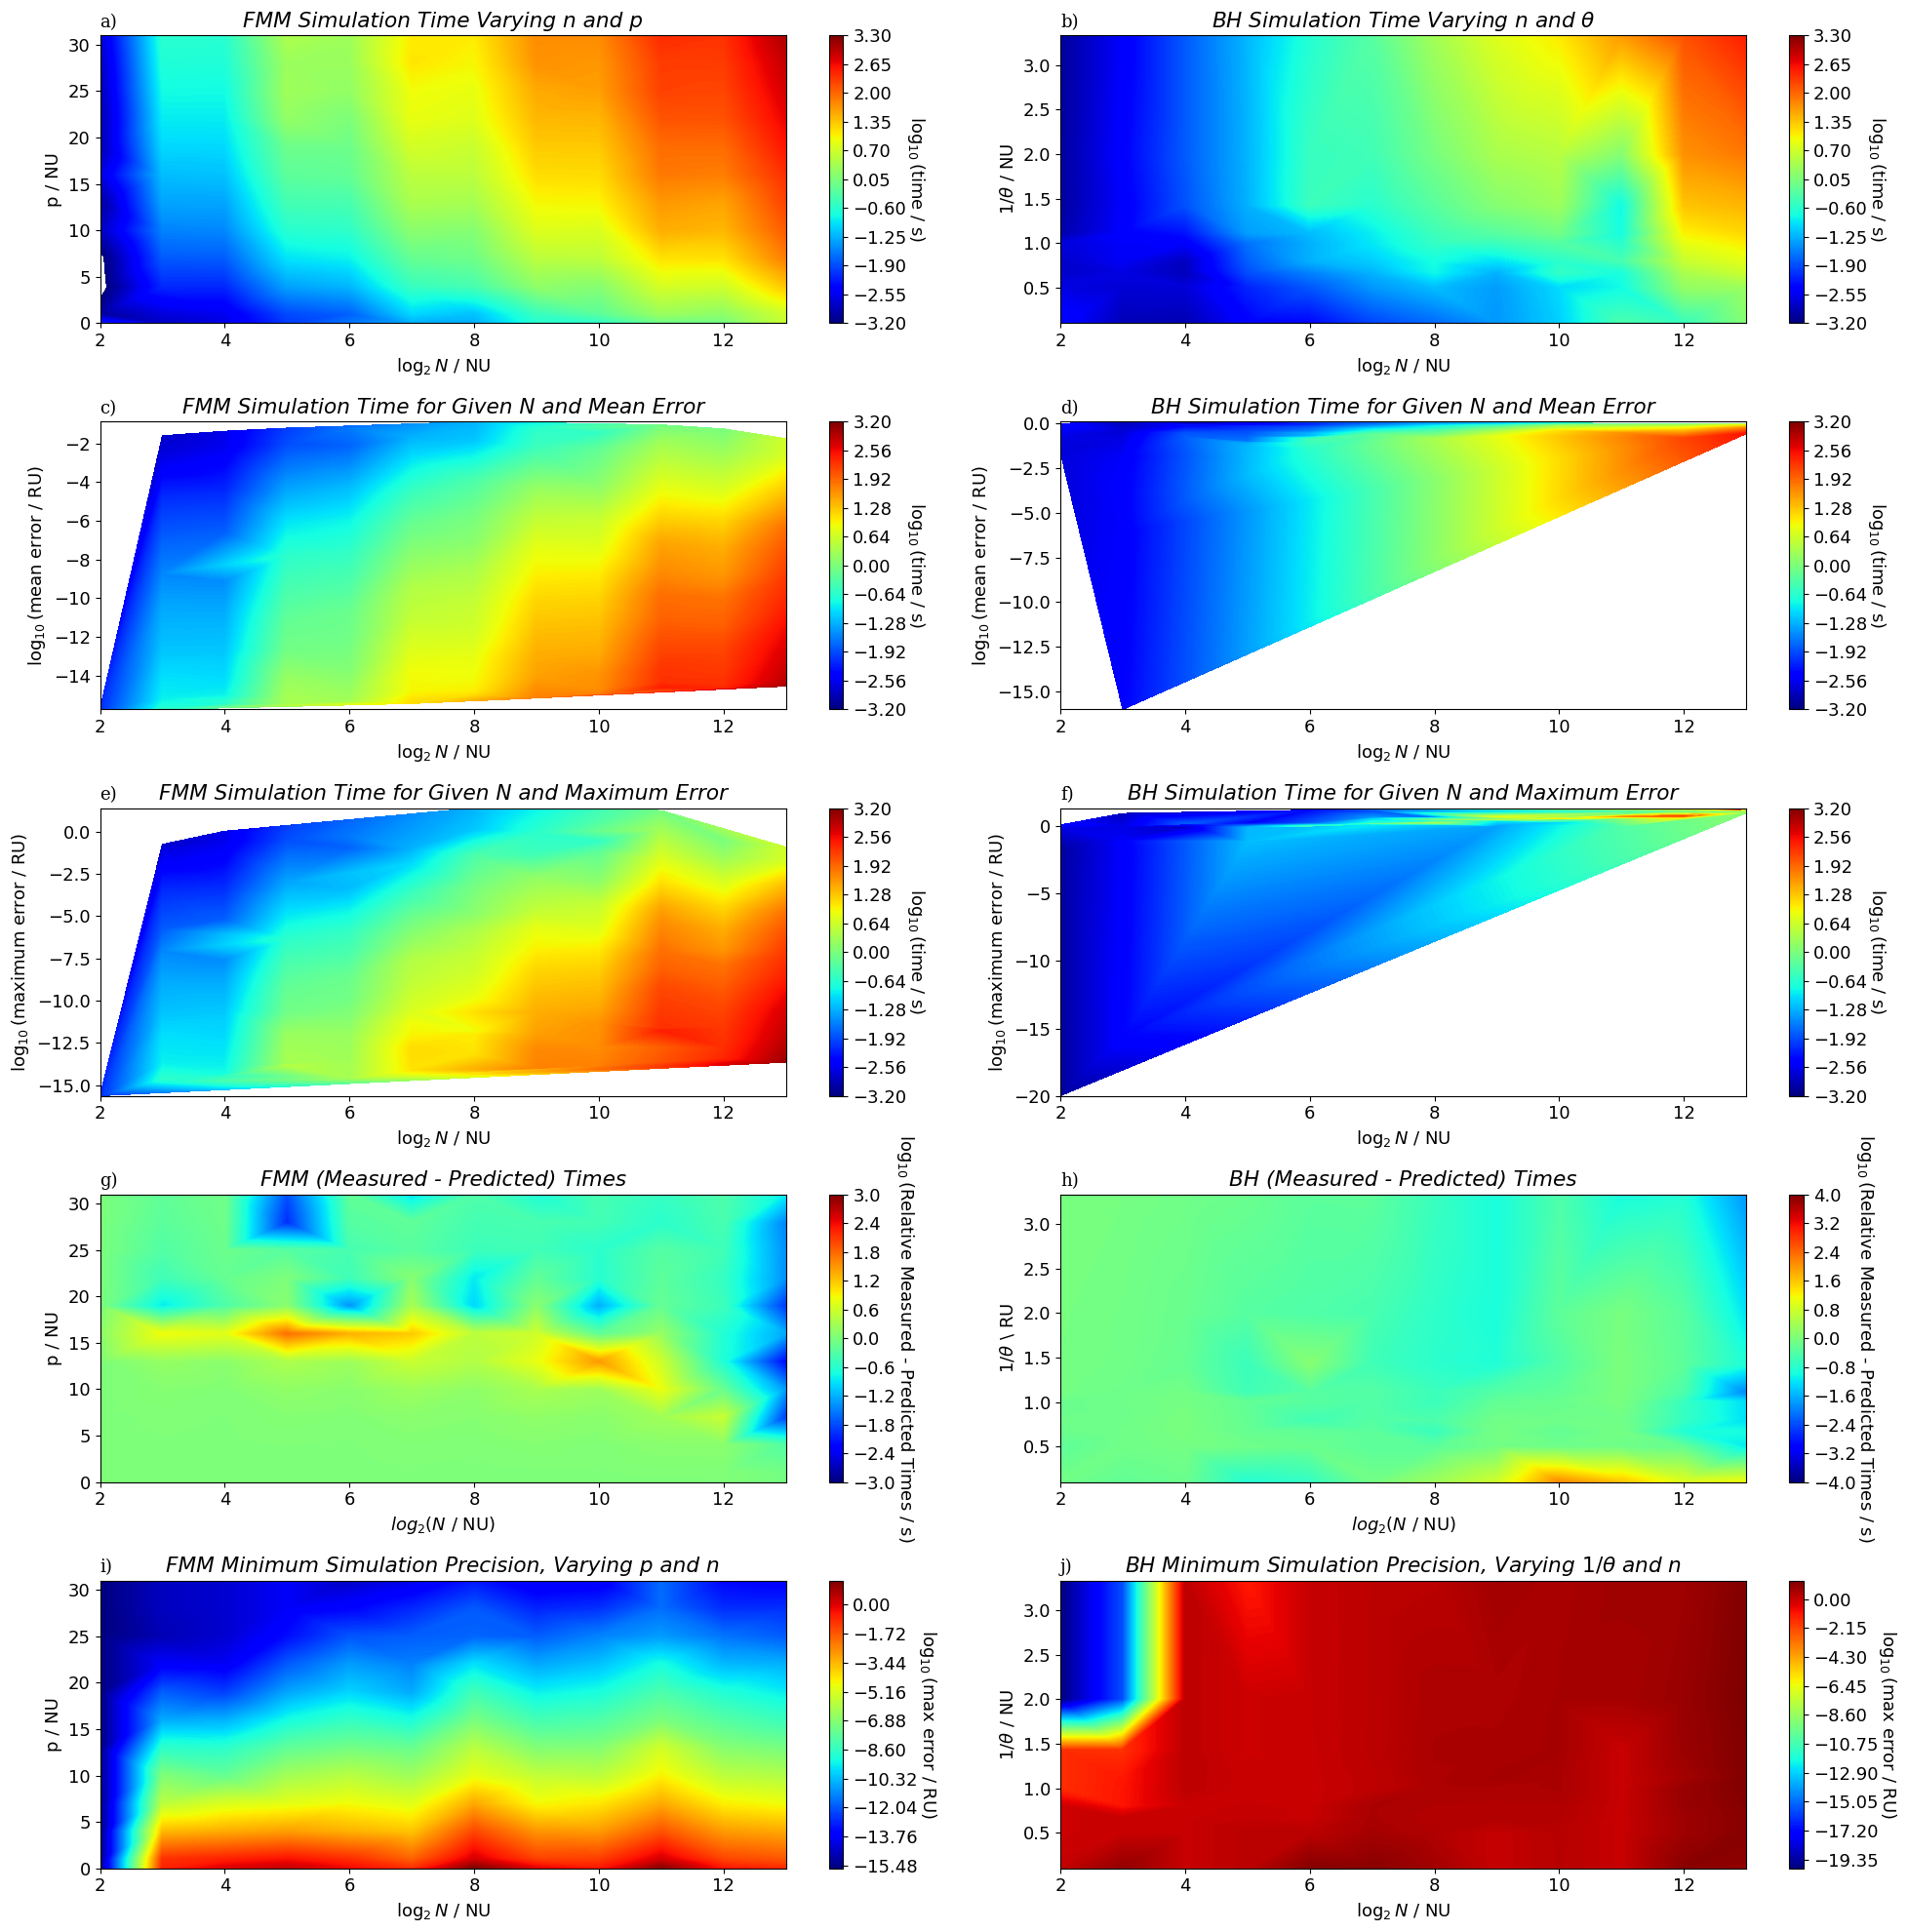

In [8]:
final_fig, final_axs = plt.subplots(5, 2)
plt.rcParams.update({'font.size': 13})
# Plotting FMM data
fmm_log2_n_p = []
fmm_log2_n_mean_log_accuracy = []
fmm_log2_n_max_log_accuracy = []
fmm_log_times = []
# Extracting data from objets
for i, n in enumerate(ns):
    for j, p in enumerate(ps):
        fmm_log2_n_p.append([np.log2(n),p])
        fmm_log2_n_mean_log_accuracy.append([np.log2(n), log_fmm_direct_diff_results[i][j].mean])
        fmm_log2_n_max_log_accuracy.append([np.log2(n), log_fmm_direct_diff_results[i][j].max])
        fmm_log_times.append(np.log10(log_fmm_direct_diff_results[i][j].sim_time))

# Plotting
fmm_log_n_p_result = util.analyse_2D([np.float64(item[0]) for item in fmm_log2_n_p], [np.float64(item[1]) for item in fmm_log2_n_p], np.float64(fmm_log_times), plotting = True, fig = final_fig, 
                                     ax = final_axs[0,0], z_range = [-3.2,3.3], z_levels = 1000, x_range = [None, None], y_range = [None, None], cmap = 'jet', x_label = r"$\log_2{N \text{ / NU}}$", 
                                     y_label ="p / NU", z_label = r"$\log_{10}(\text{time / s})$", title = "FMM Simulation Time Varying n and p", axis_label="a)")
fmm_log_n_max_accuracy_result = util.analyse_2D([np.float64(item[0]) for item in fmm_log2_n_max_log_accuracy], [np.float64(item[1]) for item in fmm_log2_n_max_log_accuracy], np.float64(fmm_log_times), 
                                                plotting = True, fig = final_fig, ax = final_axs[2,0], z_range = [-3.2, 3.2], z_levels = 1000, x_range = [None, None], y_range = [None, None], cmap = 'jet', 
                                                x_label = r"$\log_2{N \text{ / NU}}$", y_label = r"$\log_{10}(\text{maximum error / RU})$", z_label = r"$\log_{10}(\text{time / s})$", 
                                                title = "FMM Simulation Time for Given N and Maximum Error", axis_label="e)")
fmm_log_n_mean_accuracy_result = util.analyse_2D([np.float64(item[0]) for item in fmm_log2_n_mean_log_accuracy], [np.float64(item[1]) for item in fmm_log2_n_mean_log_accuracy], np.float64(fmm_log_times), 
                                                 plotting = True, fig = final_fig, ax = final_axs[1,0], z_range = [-3.2, 3.2], z_levels = 1000, x_range = [None, None], y_range = [None, None], cmap = 'jet', 
                                                 x_label = r"$\log_2{N \text{ / NU}}$", y_label = r"$\log_{10}(\text{mean error / RU})$", z_label = r"$\log_{10}(\text{time / s})$", 
                                                 title = "FMM Simulation Time for Given N and Mean Error", axis_label="c)")
fmm_log_n_p_accuracy_result = util.analyse_2D([np.float64(item[0]) for item in fmm_log2_n_p], [np.float64(item[1]) for item in fmm_log2_n_p], [np.float64(item[1]) for item in fmm_log2_n_max_log_accuracy], 
                                              plotting = True, fig = final_fig, ax = final_axs[4,0], z_range = [None, None], z_levels = 1000, x_range = [None, None], y_range = [None, None], cmap = 'jet', 
                                              x_label = r"$\log_2{N \text{ / NU}}$", y_label = "p / NU", z_label = r"$\log_{10}(\text{max error / RU})$", title = "FMM Minimum Simulation Precision, Varying p and n", 
                                              axis_label="i)")

# 2D curve fitting variables
fmm_fit_ns = 2**np.array(fmm_log2_n_p)[:,0]
fmm_fit_ps = np.array(fmm_log2_n_p)[:,1]
fmm_fit_times = 10**np.array(fmm_log_times)
fmm_p_x_data = np.vstack((fmm_fit_ns, fmm_fit_ps))

# FMM curve fit function
def fmm_complexity(X, a, b, d, e):
    n, y = X
    return n * (-2*a*y+56*b*(y**2)+4.5*d*np.sqrt(n)+e)

# 2D curve fit executaiton and plotting
fmm_p_popt, fmm_p_pcov = curve_fit(fmm_complexity, fmm_p_x_data, fmm_fit_times)
fmm_expected_times = fmm_complexity(fmm_p_x_data, fmm_p_popt[0], fmm_p_popt[1], fmm_p_popt[2], fmm_p_popt[3])
fmm_fit_real_diff = util.analyse_2D(np.log2(fmm_fit_ns), fmm_fit_ps, np.log10(np.abs((fmm_fit_times-fmm_expected_times)/fmm_expected_times)), 
                                    True, z_range=[-3,3], fig=final_fig, ax=final_axs[3,0], x_label=r"$log_2(N \text{ / NU})$", y_label="p / NU", 
                                    z_label=r"$\log_{10}(\text{Relative Measured - Predicted Times / s})$", title=r"FMM (Measured - Predicted) Times", 
                                    axis_label="g)")
print("FMM Fit a=" + '{0:.1e}'.format(fmm_p_popt[0]) + r", b="+ '{0:.1e}'.format(fmm_p_popt[1]) + r", c="+ '{0:.1e}'.format(fmm_p_popt[2]) + r", d="+ '{0:.1e}'.format(fmm_p_popt[3]))

#Plotting BH data
bh_log2_n_theta = []
bh_log2_n_mean_log_accuracy = []
bh_log2_n_max_log_accuracy = []
bh_log_times = []

# Extracting data from objects
bh_sim_times = []
for i, n in enumerate(ns):
    for j, theta in enumerate(thetas):
        bh_log2_n_theta.append([np.log2(n),theta])
        bh_log2_n_mean_log_accuracy.append([np.log2(n), log_bh_direct_diff_results[i][j].mean])
        bh_log2_n_max_log_accuracy.append([np.log2(n), log_bh_direct_diff_results[i][j].max])
        bh_log_times.append(np.log10(log_bh_direct_diff_results[i][j].sim_time))
        bh_sim_times.append(log_bh_direct_diff_results[i][j].sim_time)

# Plotting
bh_log_n_theta_result = util.analyse_2D([np.float64(item[0]) for item in bh_log2_n_theta], [np.float64(1/item[1]) for item in bh_log2_n_theta], 
                                        np.float64(bh_log_times), plotting = True, fig = final_fig, ax = final_axs[0,1], z_range = [-3.2,3.3], 
                                        z_levels = 1000, x_range = [None, None], y_range = [None, None], cmap = 'jet', x_label = r"$\log_2{N \text{ / NU}}$",
                                          y_label =r"$1/\theta$ / NU", z_label = r"$\log_{10}(\text{time / s})$", title = r"BH Simulation Time Varying n and $\theta$", axis_label="b)")
bh_log_n_max_accuracy_result = util.analyse_2D([np.float64(item[0]) for item in bh_log2_n_max_log_accuracy], [np.float64(item[1]) for item in bh_log2_n_max_log_accuracy], 
                                               np.float64(bh_log_times), plotting = True, fig = final_fig, ax = final_axs[2,1], z_range = [-3.2, 3.2], z_levels = 1000, x_range = [None, None], 
                                               y_range = [None, None], cmap = 'jet', x_label = r"$\log_2{N \text{ / NU}}$", y_label = r"$\log_{10}(\text{maximum error / RU})$", 
                                               z_label = r"$\log_{10}(\text{time / s})$", title = "BH Simulation Time for Given N and Maximum Error", axis_label="f)")
bh_log_n_mean_accuracy_result = util.analyse_2D([np.float64(item[0]) for item in bh_log2_n_mean_log_accuracy], [np.float64(item[1]) for item in bh_log2_n_mean_log_accuracy], 
                                                np.float64(bh_log_times), plotting = True, fig = final_fig, ax = final_axs[1,1], z_range = [-3.2, 3.2], z_levels = 1000, x_range = [None, None],
                                                y_range = [None, None], cmap = 'jet', x_label = r"$\log_2{N \text{ / NU}}$", y_label = r"$\log_{10}(\text{mean error / RU})$", z_label = r"$\log_{10}(\text{time / s})$", 
                                                title = "BH Simulation Time for Given N and Mean Error", axis_label="d)")
bh_log_n_theta_accuracy_result = util.analyse_2D([np.float64(item[0]) for item in bh_log2_n_theta], [np.float64(1/item[1]) for item in bh_log2_n_theta], [np.float64(item[1]) for item in bh_log2_n_max_log_accuracy], 
                                                 plotting = True, fig = final_fig, ax = final_axs[4,1], z_range = [None, None], z_levels = 1000, x_range = [None, None], y_range = [None, None], cmap = 'jet', 
                                                 x_label = r"$\log_2{N \text{ / NU}}$", y_label = r"$1/\theta$ / NU", z_label = r"$\log_{10}(\text{max error / RU})$", title = r"BH Minimum Simulation Precision, Varying $1/\theta$ and n", 
                                                 axis_label="j)")

# 2D curve fitting variables
bh_fit_ns = 2**np.array(bh_log2_n_theta)[:,0]
bh_fit_thetas = np.array(bh_log2_n_theta)[:,1]
bh_analysis_times = bh_sim_times
bh_theta_x_data = np.vstack((bh_fit_ns, bh_fit_thetas))

# BH curve fit function
def bh_complexity(X, a, c, d):
    n, theta = X
    return a*n*np.log(n) + c*n*(theta**(d*np.log2(n)))

# 2D curve fit execution and plotting
bh_theta_popt, bh_theta_pcov = curve_fit(bh_complexity, bh_theta_x_data, bh_analysis_times, [0.01,1,-2])
bh_expected_times = bh_complexity(bh_theta_x_data, bh_theta_popt[0], bh_theta_popt[1], bh_theta_popt[2])
bh_fit_real_diff = util.analyse_2D(np.log2(bh_fit_ns), 1/bh_fit_thetas, np.log10(np.abs((bh_analysis_times-bh_expected_times)/bh_expected_times)), True, z_range=[-4,4], fig=final_fig, ax=final_axs[3,1], x_label=r"$log_2(N \text{ / NU})$", 
                                   y_label=r"$1/\theta$ \ RU", z_label=r"$\log_{10}(\text{Relative Measured - Predicted Times / s})$", title=r"BH (Measured - Predicted) Times", axis_label="h)")
print("BH Fit a=" + '{0:.1e}'.format(bh_theta_popt[0]) + r", b="+ '{0:.1e}'.format(bh_theta_popt[1]) + r", c="+ '{0:.1e}'.format(bh_theta_popt[2]))

final_fig.set_size_inches(20,20)
final_fig.tight_layout()
final_fig
plt.show()


2
[ 0.00149702 -0.4597226 ]
3
[0.00289841 0.26036887]
4
[0.00565735 0.958474  ]
5
[0.0286536 0.7471508]
6
[0.11608553 0.82077029]
7
[0.13713208 1.21357235]
8
[0.31870377 1.63229858]
9
[0.55739526 2.06583716]
10
[0.66706179 2.42240392]
11
[0.01150015 6.84956091]
12
[10.53089618  2.1708038 ]
13
[11.3538214   2.76953119]


/var/folders/kx/94yhyxhd7fz53_m_dcz_84nr0000gn/T/ipykernel_3075/1707539342.py:2: RuntimeWarning: divide by zero encountered in power
  return a*x**b #a*np.log2((x))


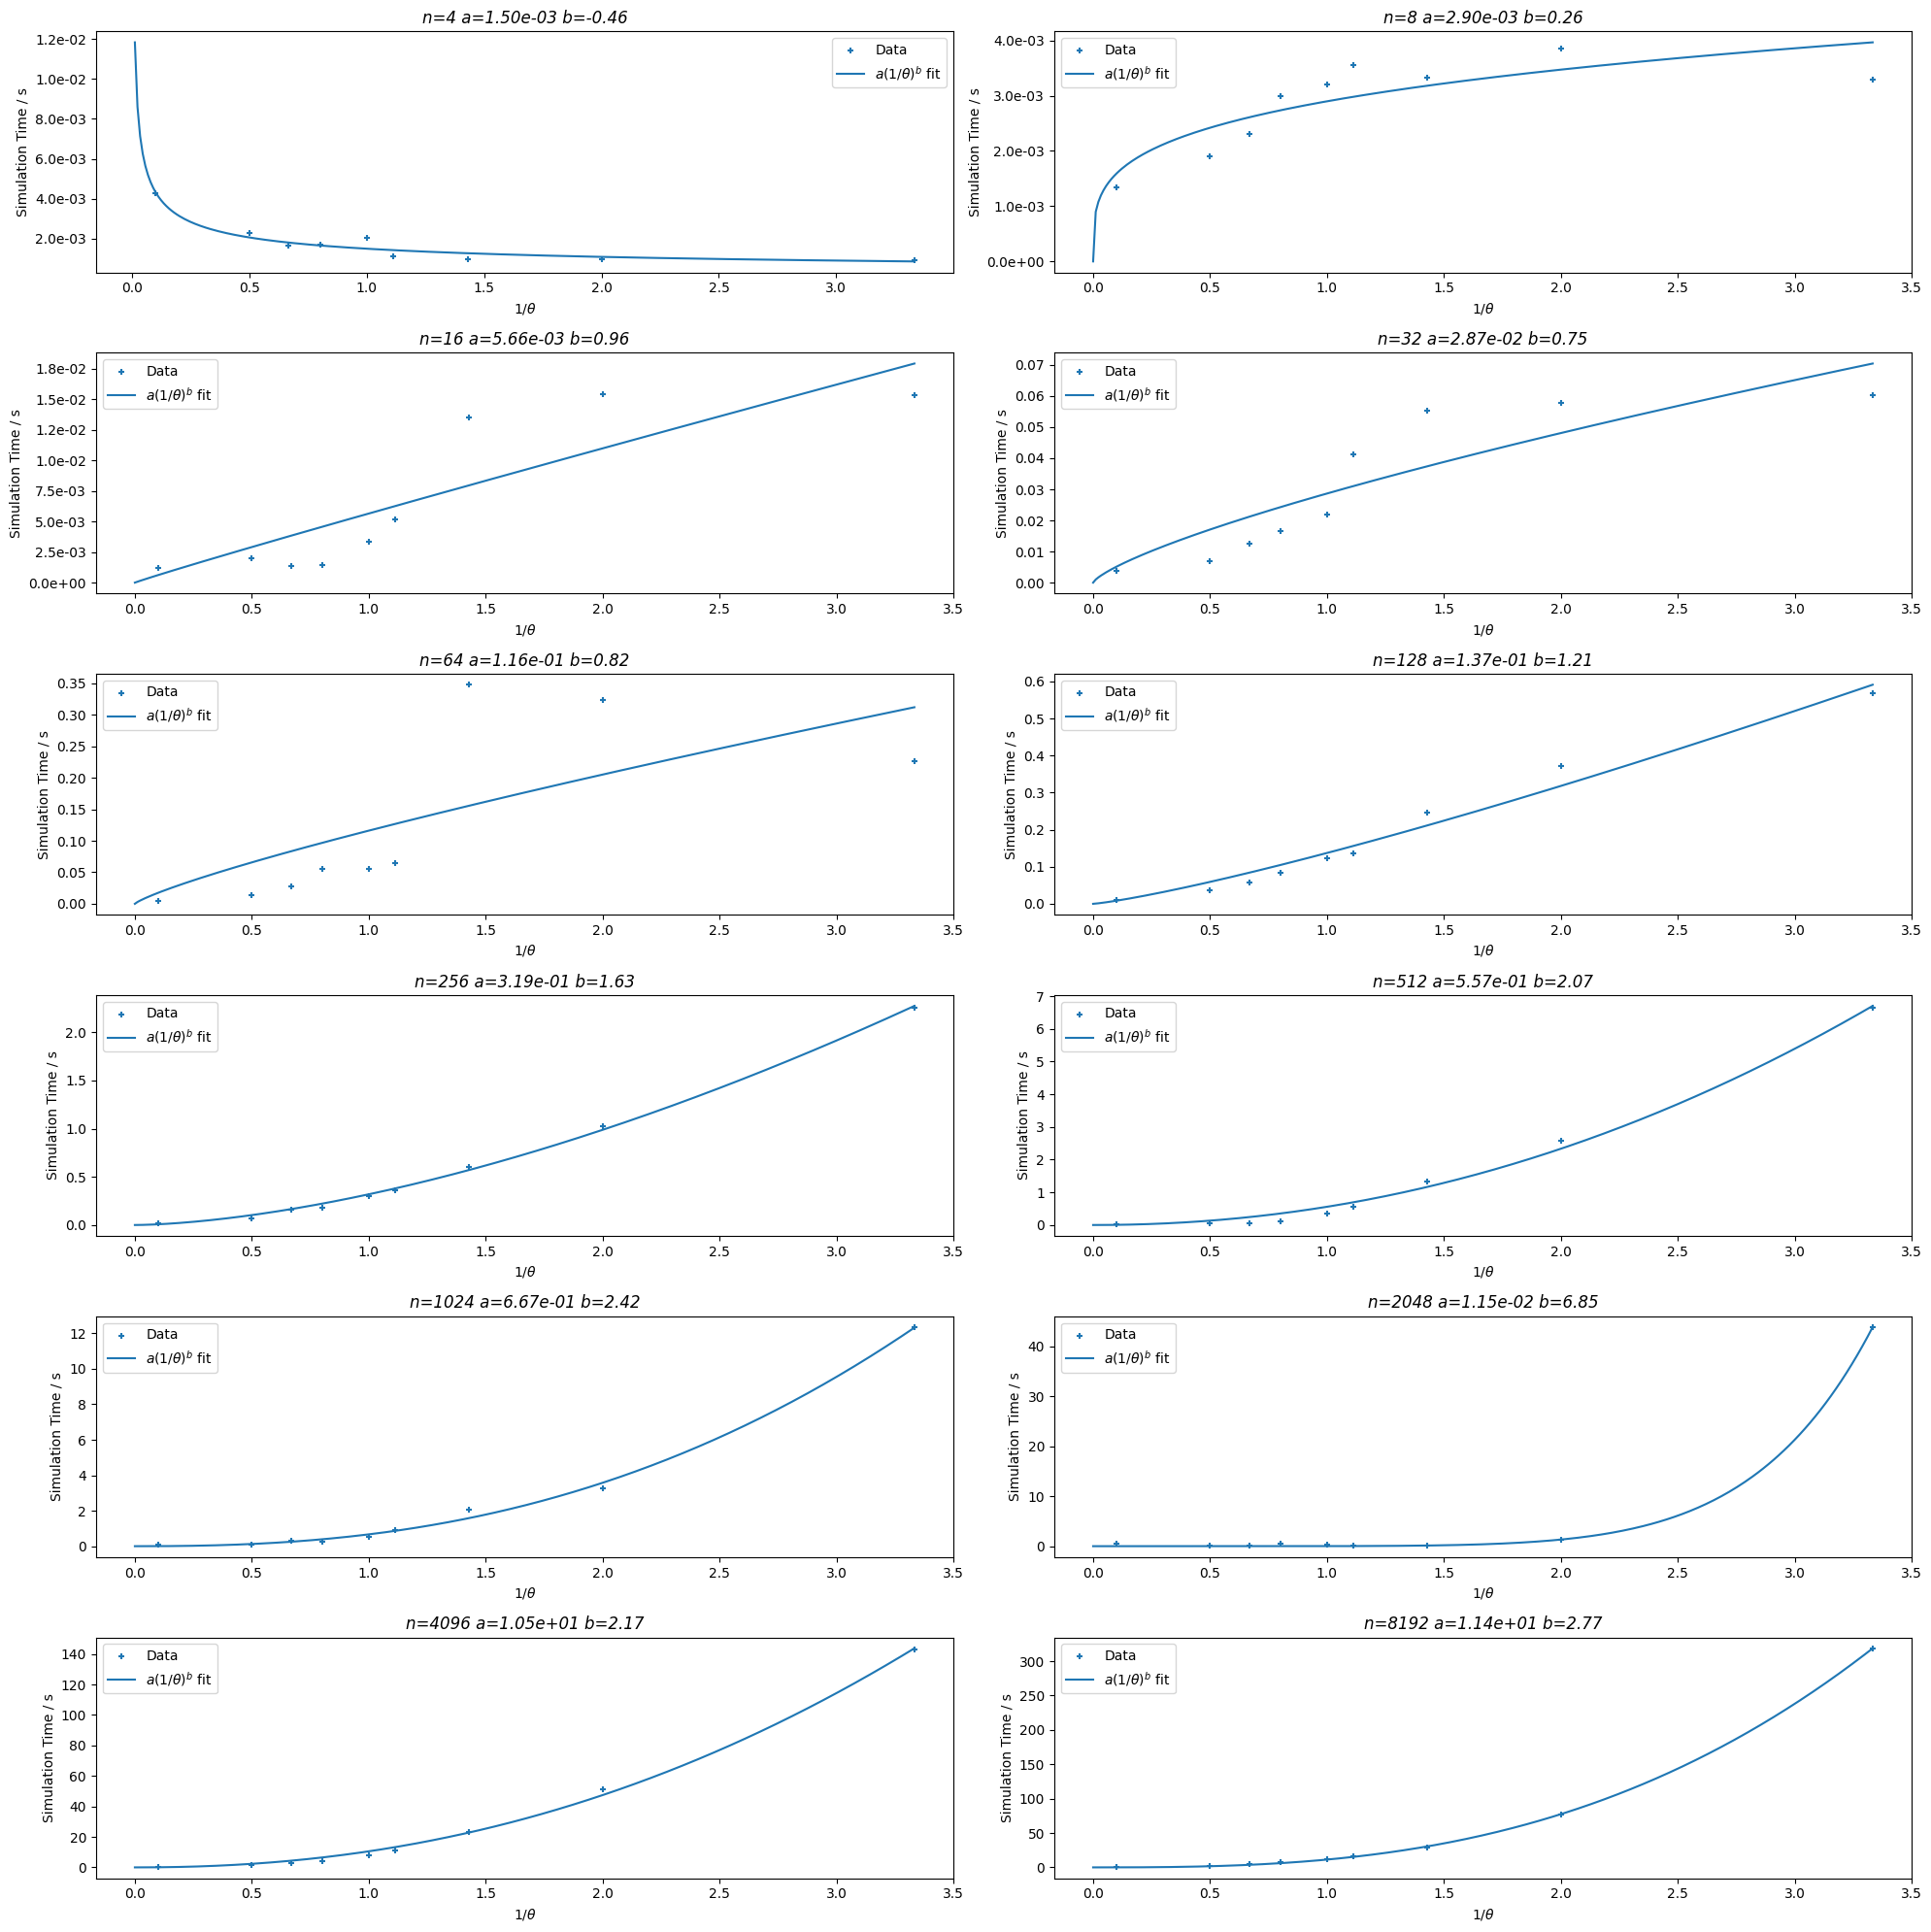

/var/folders/kx/94yhyxhd7fz53_m_dcz_84nr0000gn/T/ipykernel_3075/1707539342.py:33: RuntimeWarning: invalid value encountered in log2
  coeff_data_coeff_plot = util.analyse_3D(np.log2(bh_analysis_ns), np.log2(np.array(fixed_n_popt_coeffs))[:,0], True, format="+", fig=popt_fig, ax=popt_axs[0], label="Data", marker_size=20)


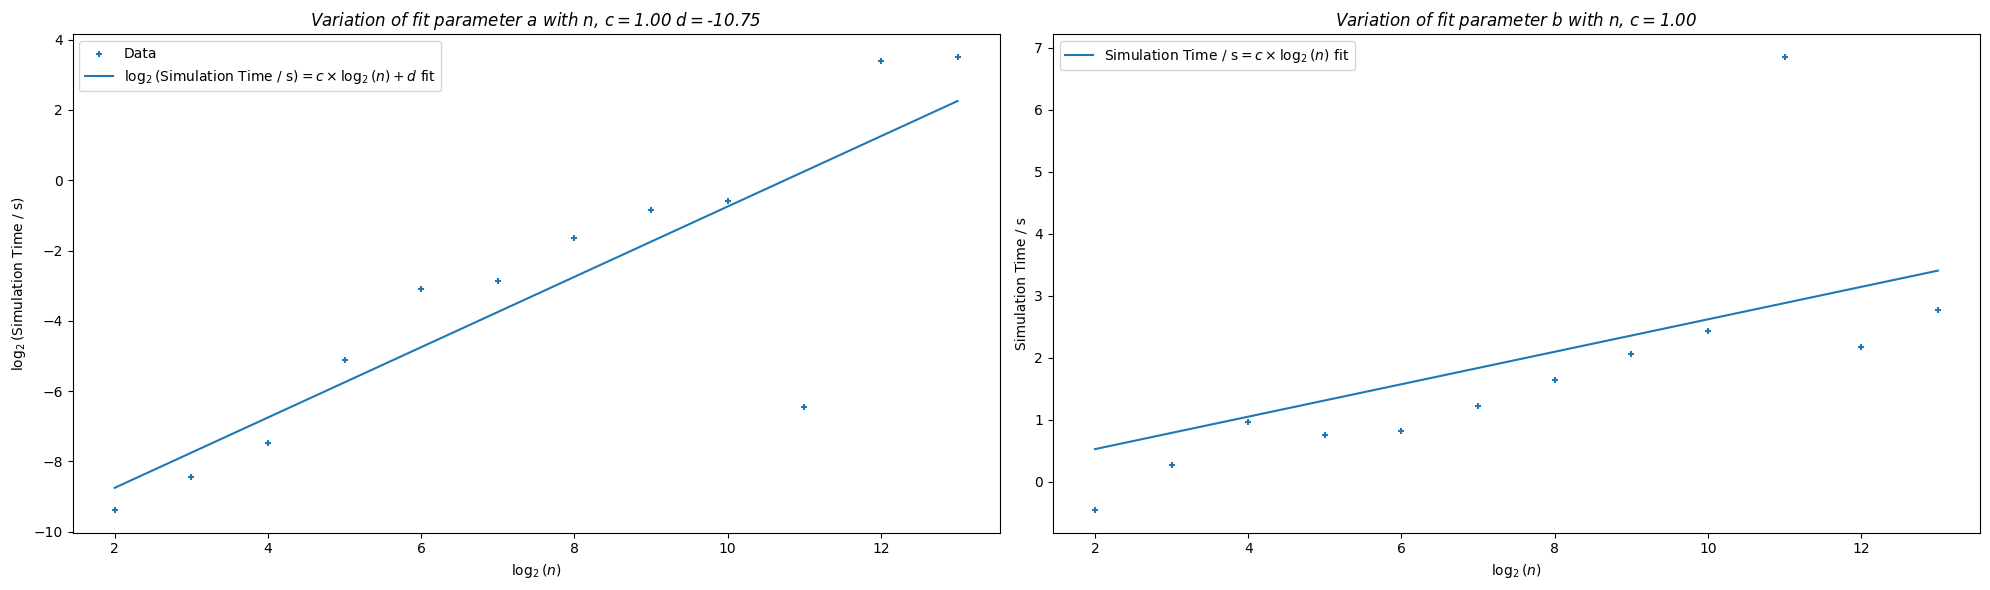

In [6]:
# bh fixed n fit function
def bh_fixed_n_complexity(x, a, b):
    return a*x**b

# Set up plot
theta_dep_fig, theta_dep_axs = plt.subplots(6,2)

# Calculate coefficients to plot via curve fitting analysis times for 1/theta
fixed_n_popt_coeffs = []
for i in range(0,6):
    for j in range(0,2):
        log_n = 2*i+ int((j))+2
        print(log_n)
        bh_analysis_times = 10**np.float64(bh_log_times[9*(log_n-2):9*(log_n-1)])
        bh_analysis_thetas = np.array([np.float64(item[1]) for item in np.array(bh_log2_n_theta)[9*(log_n-2):9*(log_n-1)]])
        bh_computation_time_const_n_result = util.analyse_3D(1/bh_analysis_thetas, bh_analysis_times, plotting=True, format="+", 
                                                             scatter=True, fig = theta_dep_fig, ax=theta_dep_axs[i,j], x_label=r"$1/\theta$ / NU", 
                                                             y_label="Simulation Time / s", title="n="+str(2**log_n), marker_size=20, label="Data")
        bh_fixed_n_popt, bh_fixed_n_pcov = curve_fit(bh_fixed_n_complexity, 1/bh_analysis_thetas, bh_analysis_times)
        plot_inverse_thetas = np.linspace(0,1/0.3,300)
        expected_times = bh_fixed_n_complexity(plot_inverse_thetas, bh_fixed_n_popt[0], bh_fixed_n_popt[1])
        bh_computation_time_const_n_fit = util.analyse_3D(plot_inverse_thetas, expected_times, True, scatter=False, label=r"$a(1/\theta)^b$ fit", 
                                                          legend=True, ax=theta_dep_axs[i,j], fig=theta_dep_fig, x_label=r"$1/\theta$ / NU", 
                                                          y_label="Simulation Time / s", 
                                                          title="N="+str(2**log_n) + " a=" + '{0:.2e}'.format(bh_fixed_n_popt[0]) + " b=" + '{0:.2f}'.format(bh_fixed_n_popt[1]))
        print(bh_fixed_n_popt)
        fixed_n_popt_coeffs.append(bh_fixed_n_popt)

theta_dep_fig.set_size_inches(20,20)
theta_dep_fig.tight_layout()
theta_dep_fig
plt.show()

# straight line fit function
def straight_line(x, c, d):
    return c*x + d

# straight line y intercept 0 fit function
def straight_line_int0(x, c):
    return c*x

popt_fig, popt_axs = plt.subplots(1,2)
bh_analysis_ns = 2**np.array([np.float64(item[0]) for item in np.array(bh_log2_n_theta)[0::9]])

# Plot coefficients from previous section and curve fit them
coeff_data_coeff_plot = util.analyse_3D(np.log2(bh_analysis_ns), np.log2(np.array(fixed_n_popt_coeffs))[:,0], True, format="+", fig=popt_fig, ax=popt_axs[0], label="Data", marker_size=20)
coeff_coeff_popt, coeff_coeff_pcov = curve_fit(straight_line, np.log2(bh_analysis_ns), np.log2(np.array(fixed_n_popt_coeffs)[:,0]))
coeff_fit_coeff_plot = util.analyse_3D(np.log2(bh_analysis_ns), straight_line(np.log2(bh_analysis_ns), coeff_coeff_popt[0], coeff_coeff_popt[1]),True, fig=popt_fig, ax=popt_axs[0], 
                                       scatter=False, x_label=r"$\log_2(N \text{ / NU})$", y_label=r"$\log_2(\text{BH fit parameter } a \text{ / NU})$", label=r"$\log_2(a)=c\times\log_2(n) + d$ fit", 
                                       legend=True, title=r"Variation of fit parameter $a$ with $n$, $c=$" + '{0:.2f}'.format(coeff_coeff_popt[0]) + r" $d=$" + '{0:.2f}'.format(coeff_coeff_popt[1]))

coeff_data_exponent_plot = util.analyse_3D(np.log2(bh_analysis_ns), np.array(fixed_n_popt_coeffs)[:,1], True, format="+", fig=popt_fig, ax=popt_axs[1], marker_size=20)
keep_indices= np.invert(np.isinf(np.array(fixed_n_popt_coeffs)[:,1]) + np.isnan(np.array(fixed_n_popt_coeffs)[:,1]))
coeff_exponent_popt, coeff_exponent_pcov = curve_fit(straight_line_int0, np.log2(bh_analysis_ns)[keep_indices], np.array(fixed_n_popt_coeffs)[:,1][keep_indices])
coeff_fit_exponent_plot = util.analyse_3D(np.log2(bh_analysis_ns), straight_line_int0(np.log2(bh_analysis_ns), coeff_exponent_popt[0]),True, fig=popt_fig, ax=popt_axs[1], scatter=False, 
                                          x_label=r"$\log_2(N \text{ / NU})$", y_label=r"$\log_2(\text{BH fit parameter } b \text{ / NU})$", label=r"$\log_2(b)=c\times \log_2(n)$ fit", 
                                          legend=True, title=r"Variation of fit parameter $b$ with $n$, $c=$" + '{0:.2f}'.format(coeff_coeff_popt[0]) + r" and $d=0$ (fixed)")

popt_fig.set_size_inches(20,6)
popt_fig.tight_layout()
popt_fig

plt.show()
